In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('3.12. Example.csv')

In [4]:
raw_data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


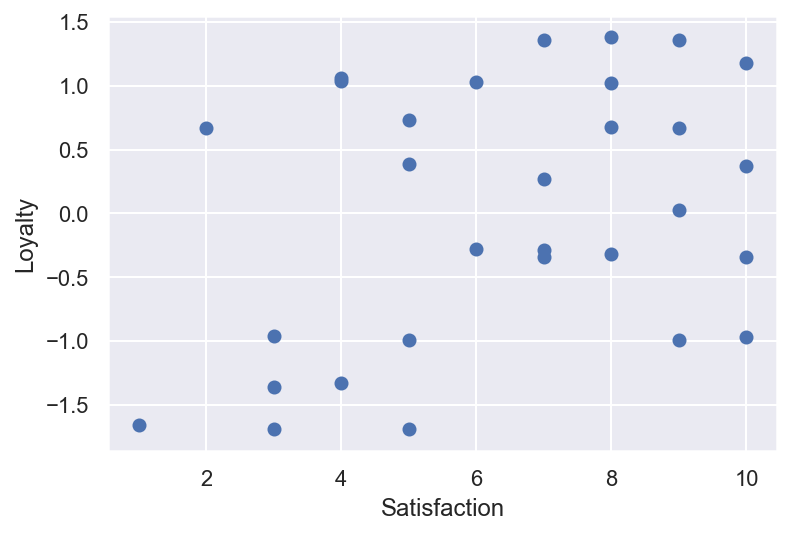

In [5]:
plt.scatter(raw_data['Satisfaction'],raw_data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [7]:
# Select the features
x = raw_data.copy()

In [12]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.inertia_

74.51511402714932

In [17]:
clusters = kmeans.fit_predict(x)

In [20]:
data = raw_data.copy()
data['Cluster'] = clusters
data

,Satisfaction,Loyalty,Cluster
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


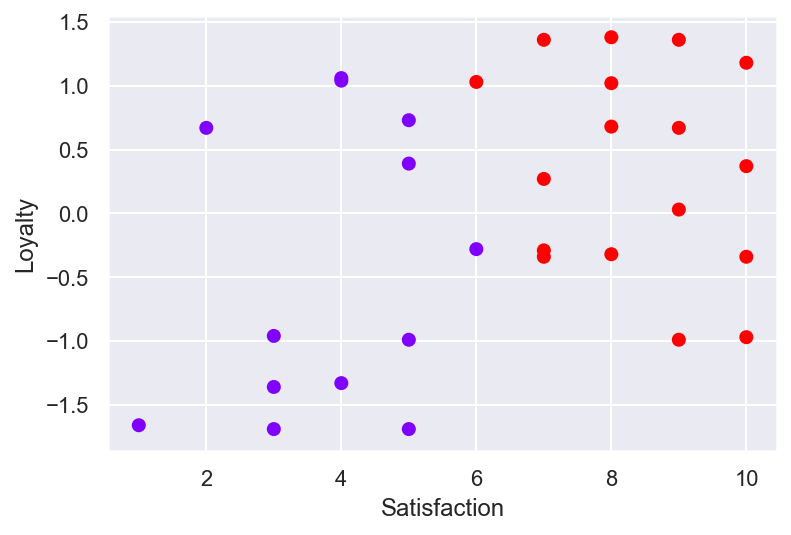

In [21]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c = data['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [ ]:
# We notice that the clusters here were defined based on satisfaction only. This is as a result of the satisfaction 
# data not being standardized - the weights of Satisfaction are higher than that of Loyalty

#### We scale the Satisfaction data

In [25]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

#### Using the elbow method

In [26]:
max_clusters = data['Satisfaction'].count()
max_clusters

30

In [59]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.43900588143606,
 4.395247193896115,
 3.728283444358953]

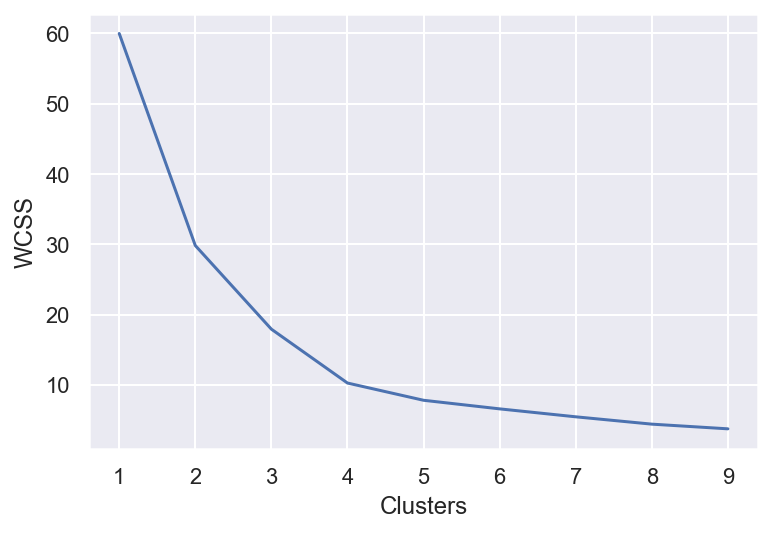

In [60]:
plt.plot(list(range(1,10)), wcss) # This number was chosen arbitrarily for easy interpretation ahead
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

#### Test with different clusters

In [55]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
cluster_data = x.copy()
cluster_data['clusters'] = kmeans_new.fit_predict(x_scaled)
cluster_data

,Satisfaction,Loyalty,clusters
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,1
5,1,-1.66,2
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,0
9,8,0.68,0


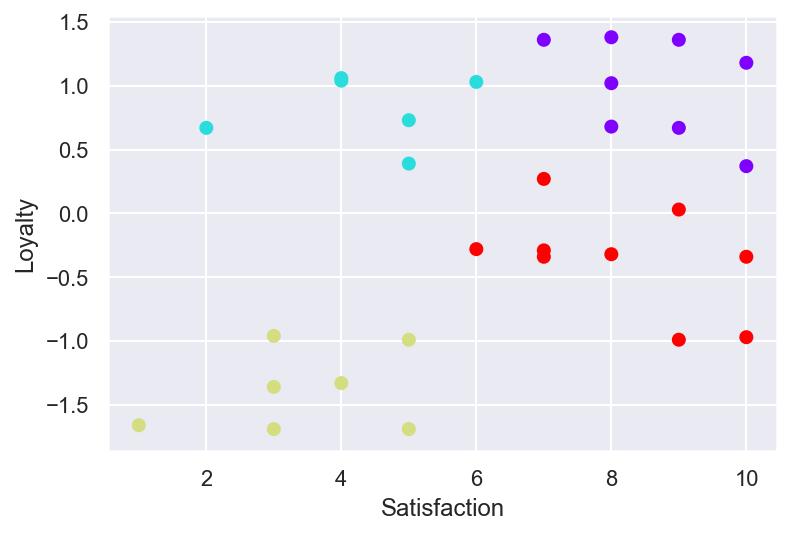

In [56]:
plt.scatter(cluster_data['Satisfaction'], cluster_data['Loyalty'], c=cluster_data['clusters'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

#### Based on these clusters, we can then segment the customers to carry out exploratory analysis